In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arnabsarkarml007
Your Kaggle Key: ··········


100%|██████████| 1.06G/1.06G [00:51<00:00, 22.4MB/s]


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='./dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='./dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
def normalize_img(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label
train_ds=train_ds.map(normalize_img)
validation_ds=validation_ds.map(normalize_img)

In [36]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [38]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.1332 - accuracy: 0.5768 - val_loss: 2.7029 - val_accuracy: 0.5792
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6042 - accuracy: 0.6736 - val_loss: 0.5981 - val_accuracy: 0.7256
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5552 - accuracy: 0.7294 - val_loss: 0.5905 - val_accuracy: 0.6968
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4806 - accuracy: 0.7743 - val_loss: 0.5939 - val_accuracy: 0.6362
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4207 - accuracy: 0.8108 - val_loss: 0.5150 - val_accuracy: 0.7350
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3606 - accuracy: 0.8462 - val_loss: 0.4715 - val_accuracy: 0.7782
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2856 - accuracy: 0.8837 - val_loss: 0.4871 - val_ac

In [40]:
import matplotlib.pyplot as plt
import cv2

In [41]:
test_img=cv2.imread('./dog.jpg')

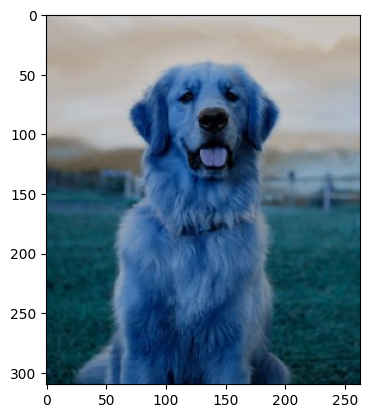

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(310, 263, 3)

In [44]:
test_img=cv2.resize(test_img,(256,256))

In [45]:
test_input=test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 152ms/step


array([[1.]], dtype=float32)

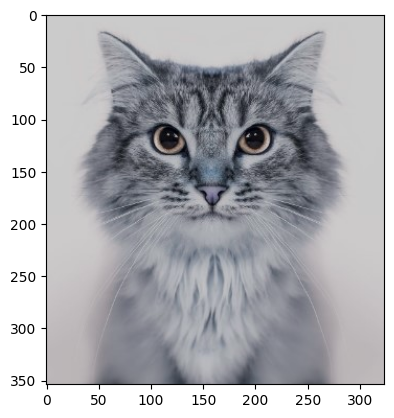

In [47]:
test_img_2=cv2.imread('./cat.jpg')
plt.imshow(test_img_2)

In [48]:
test_img_2.shape

(354, 324, 3)

In [49]:
test_img_2=cv2.resize(test_img_2,(256,256))
test_input_2=test_img_2.reshape((1,256,256,3))

In [50]:
model.predict(test_input_2)

1/1 [==============================] - 0s 30ms/step


array([[0.]], dtype=float32)